In [1]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# load 'CHL_mean_smoothed.nc'
chl_mean = xr.open_dataset('CHL_mean_smoothed.nc')

chl_mean



<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056, doy: 246)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * doy        (doy) int64 60 61 62 63 64 65 66 ... 299 300 301 302 303 304 305
Data variables:
    CHL        (doy, latitude, longitude) float32 ...

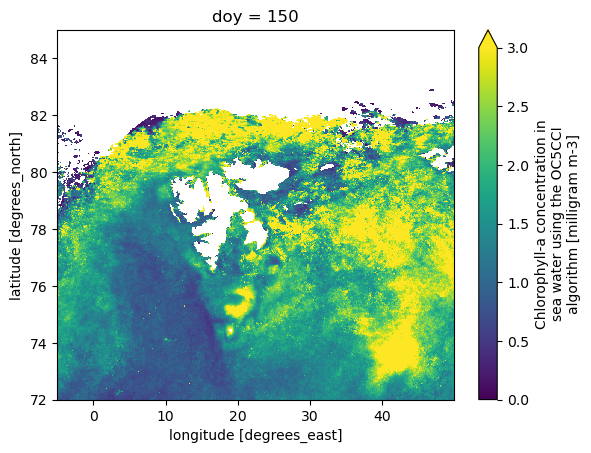

In [3]:
# plot doy 233 CHL scale 0-3
chl_mean.sel(doy=150)['CHL'].plot(vmin=0, vmax=3)



carico i punti per cui sono stati estratti i dati per la serie storica

In [4]:
# leggo il csv com pd '/mnt/d/Dropbox/R_projects/SV_phenology/data/04.2_curve4points.csv'
df2 = pd.read_csv('/mnt/d/Dropbox/R_projects/SV_phenology/data/04.2_curve4points.csv', sep = ',')

# creo una colonna con anno ESTRATTO DA TIME
df2['year'] = df2['time'].str[:4]
# estraggo il giorno dell'anno nella colonna doy (dopo aver interpretato time come una data)
df2['doy'] = pd.to_datetime(df2['time']).dt.dayofyear

df2

,time,latitude,longitude,CHL,lab,year,doy
0,1998-03-01,74.421875,9.380208,NaN,9.38_74.42,1998,60
1,1998-03-02,74.421875,9.380208,NaN,9.38_74.42,1998,61
2,1998-03-03,74.421875,9.380208,NaN,9.38_74.42,1998,62
3,1998-03-04,74.421875,9.380208,NaN,9.38_74.42,1998,63
4,1998-03-05,74.421875,9.380208,NaN,9.38_74.42,1998,64
...,...,...,...,...,...,...,...
24491,2022-10-27,76.890625,7.609375,NaN,7.61_76.89,2022,300
24492,2022-10-28,76.890625,7.609375,NaN,7.61_76.89,2022,301
24493,2022-10-29,76.890625,7.609375,NaN,7.61_76.89,2022,302
24494,2022-10-30,76.890625,7.609375,NaN,7.61_76.89,2022,303


In [5]:
unique_labs = df2['lab'].unique()
# creo un dataframe con le coordinate estratte da unique labs (longitudine e latitudine separate da "_"
coo = pd.DataFrame(unique_labs, columns=['coo'])
coo[['lon','lat']] = coo['coo'].str.split('_',expand=True)
# trasforma come valori numerici
coo['lon'] = pd.to_numeric(coo['lon'])
coo['lat'] = pd.to_numeric(coo['lat'])
coo

,coo,lon,lat
0,9.38_74.42,9.38,74.42
1,1.78_75.4,1.78,75.40
2,22.24_74.91,22.24,74.91
3,7.61_76.89,7.61,76.89


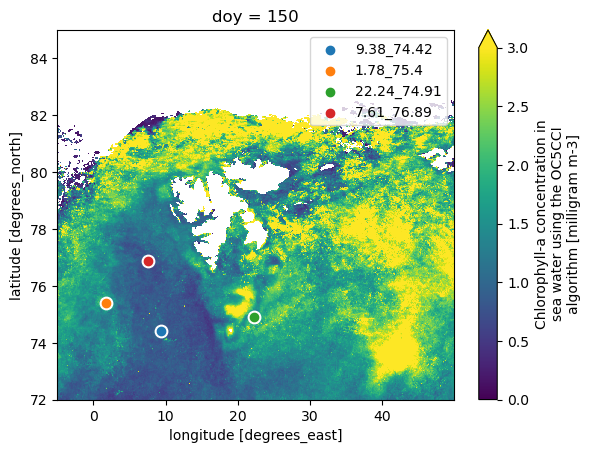

In [6]:
# plotta chl_mean.sel(doy=150)['CHL'].plot(vmin=0, vmax=3), aggiungendo i punti di campionamento e usando coo come label
chl_mean.sel(doy=150)['CHL'].plot(vmin=0, vmax=3)
# add points white color
plt.scatter(coo['lon'], coo['lat'], color='white', s = 80)

for lab in unique_labs:
    subset = coo['coo'] == lab
    plt.scatter(coo.loc[subset, 'lon'], coo.loc[subset, 'lat'], label=lab)
plt.legend()
plt.show()


plotto le serie storiche


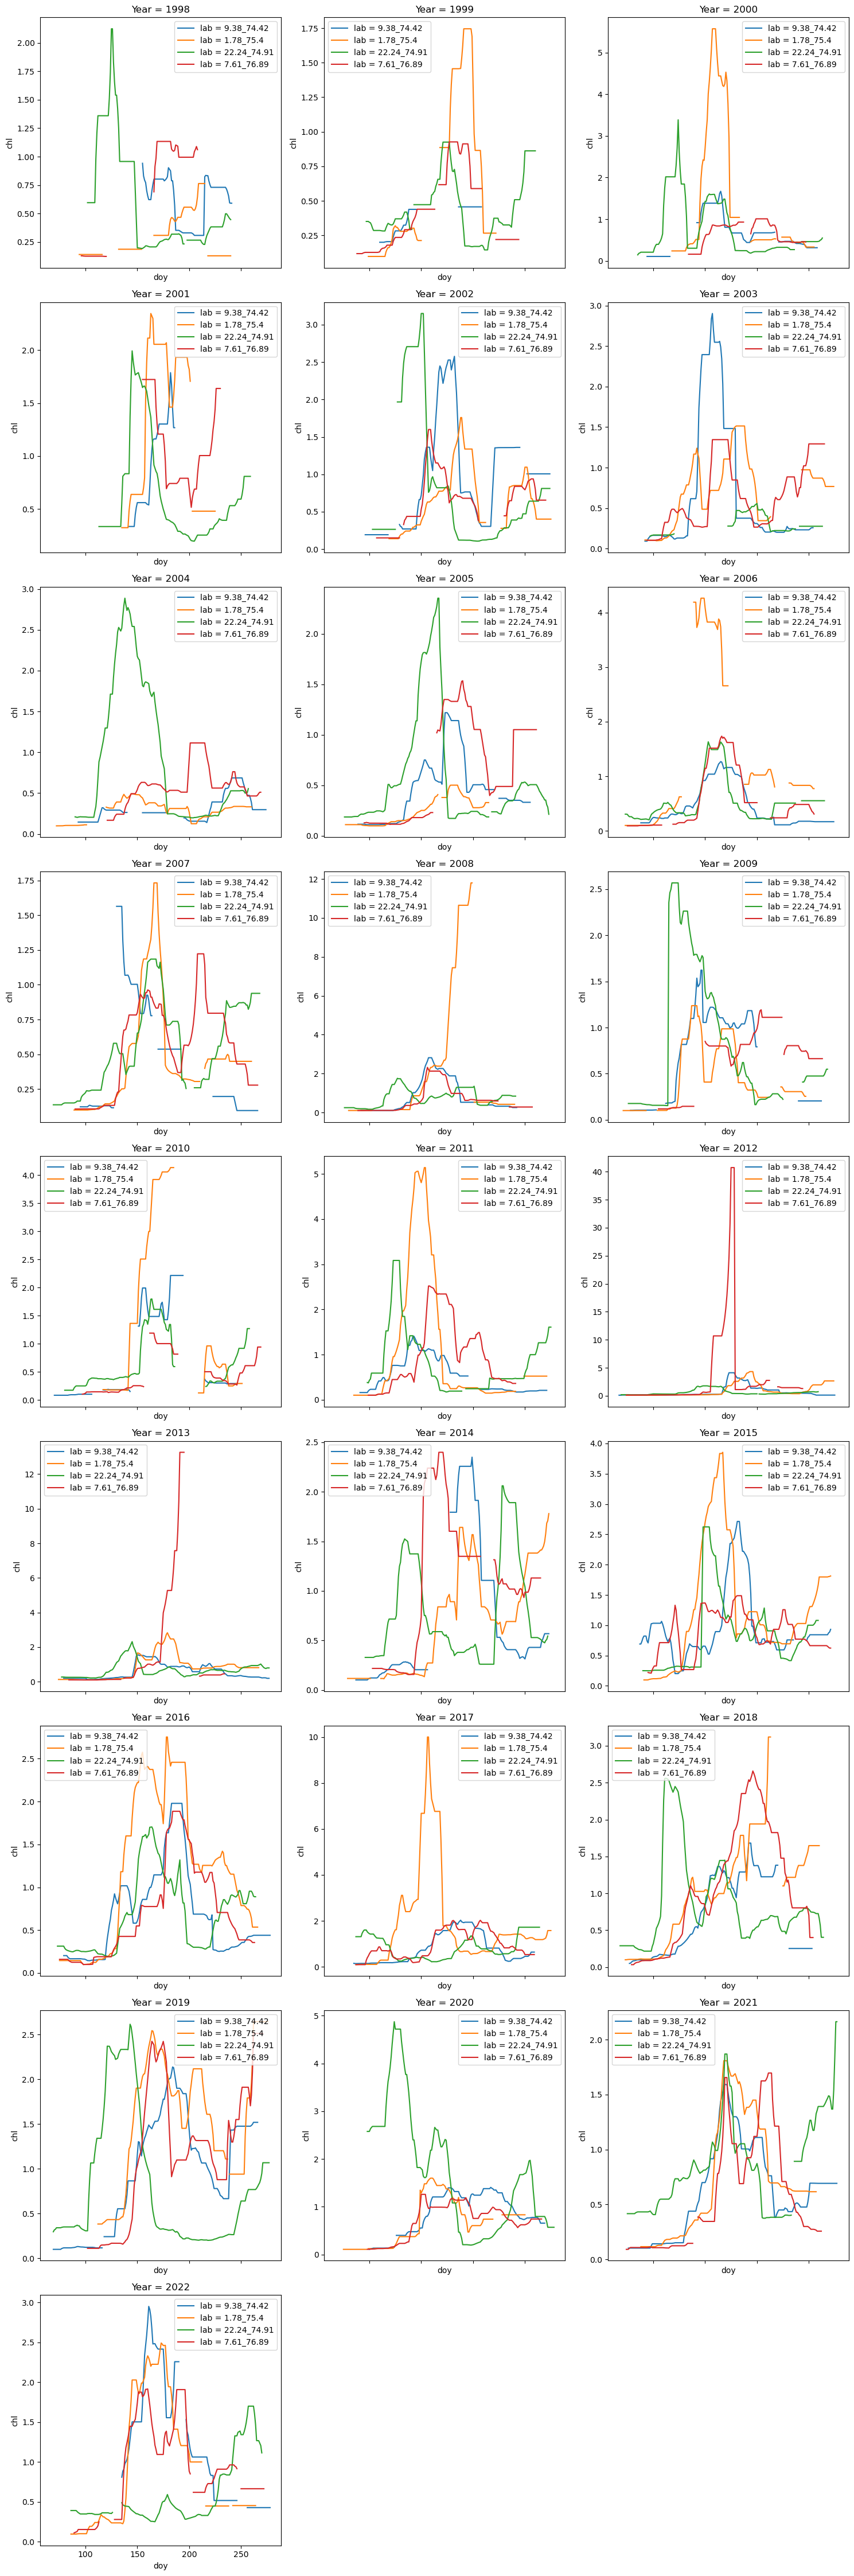

In [7]:
import math

unique_years = df2['year'].unique()


n_years = len(unique_years)
n_cols = 3  # Max number of columns
n_rows = math.ceil(n_years / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, sharex=True,  figsize=(5 * n_cols, 5 * n_rows))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Hide the extra subplots if the total number of subplots is more than n_years
for ax in axs[n_years:]:
    ax.axis('off')

for i, year in enumerate(unique_years):
    ax = axs[i]
    subset_year = df2[df2['year'] == year]
    for lab in unique_labs:
        subset = subset_year[subset_year['lab'] == lab]
        ax.plot(subset['doy'], subset['CHL'], label=f'lab = {lab}')
    ax.set_title(f'Year = {year}')
    ax.set_xlabel('doy')
    ax.set_ylabel('chl')
    ax.legend()

plt.tight_layout()
plt.show()

In [8]:


# Converti il Dataset xarray in un DataFrame
df_xr = chl_mean['CHL'].to_dataframe().reset_index()
# lon and lat as 2 decimal places
df_xr['lon'] = df_xr['longitude'].round(2)
df_xr['lat'] = df_xr['latitude'].round(2)



In [15]:
# seleziono le righe che nanno lon = 22.24	e lat = 74.91
df_clim = df_xr[(df_xr['lon'] == 22.24) & (df_xr['lat'] == 74.91)]

In [10]:
# seleziono le colonne di df_xr che hanno sia lon che lat uguali ad almeno una riga di coo
df_clim

,doy,latitude,longitude,CHL,lon,lat
1022731,60,74.911458,22.244792,NaN,22.24,74.91
2340619,61,74.911458,22.244792,NaN,22.24,74.91
3658507,62,74.911458,22.244792,NaN,22.24,74.91
4976395,63,74.911458,22.244792,NaN,22.24,74.91
6294283,64,74.911458,22.244792,NaN,22.24,74.91
...,...,...,...,...,...,...
318633739,301,74.911458,22.244792,NaN,22.24,74.91
319951627,302,74.911458,22.244792,NaN,22.24,74.91
321269515,303,74.911458,22.244792,NaN,22.24,74.91
322587403,304,74.911458,22.244792,NaN,22.24,74.91


<Axes: xlabel='doy'>

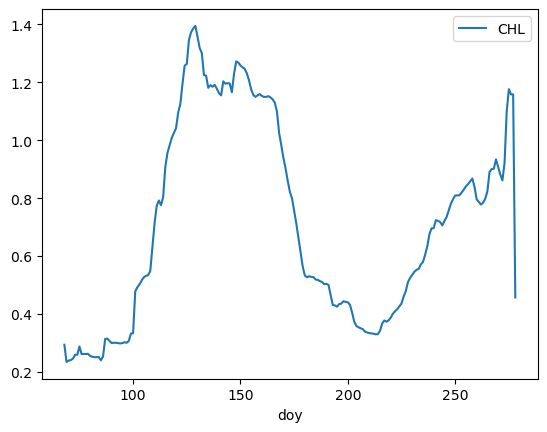

In [11]:
# plot doy CHL 
df_clim.plot(x='doy', y='CHL')

# Metriche fenologiche

In [12]:
#calcolo la soglia come mediana * 1.05 
chl_th = df_clim['CHL'].median() * 1.05
chl_th 



0.7308212578296661

In [18]:
df_clim['is_above_threshold'] = df_clim['CHL'] > chl_th

df_clim['is_above_threshold'].fillna(method='ffill', inplace=True)

# 2. Per ogni cambio di valore in 'is_above_threshold' assegna un ID unico
df_clim['group'] = (df_clim['is_above_threshold'] != df_clim['is_above_threshold'].shift()).cumsum()

# group over = group only if is_above_threshold is True
df_clim['group_over'] = df_clim['group'] * df_clim['is_above_threshold']


/tmp/ipykernel_3310/2122111320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clim['is_above_threshold'] = df_clim['CHL'] > chl_th
/tmp/ipykernel_3310/2122111320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clim['is_above_threshold'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_3310/2122111320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [40]:


# 3. Calcolare il numero di giorni consecutivi sopra la soglia per ogni ID unico
group_counts = df_clim.groupby('group_over').size()

# 4. Filtrare per i giorni che fanno parte di un periodo di almeno 14 giorni sopra la soglia
valid_groups = group_counts[group_counts >= 14].index

# Sottoseleziona solo i gruppi che sono sopra la soglia
blooms = df_clim[(df_clim['group_over'].isin(valid_groups)) & df_clim['is_above_threshold']]

print(blooms)

# rinomina group_over come bloom_id e riprendi il conteggio da 1
blooms['bloom_id'] = blooms['group_over'].astype('category').cat.codes + 1

#riattacca bloom_id a df_clim
df_clim = df_clim.merge(blooms[['doy', 'bloom_id']], on='doy', how='left')

# definisco il numero di picchi come il massimo valore di bloom_id
n_peaks = blooms['bloom_id'].max()

     doy   latitude  longitude       CHL    lon    lat  is_above_threshold  \
51   111  74.911458  22.244792  0.773529  22.24  74.91                True   
52   112  74.911458  22.244792  0.791872  22.24  74.91                True   
53   113  74.911458  22.244792  0.775921  22.24  74.91                True   
54   114  74.911458  22.244792  0.804018  22.24  74.91                True   
55   115  74.911458  22.244792  0.907621  22.24  74.91                True   
..   ...        ...        ...       ...    ...    ...                 ...   
213  273  74.911458  22.244792  0.921977  22.24  74.91                True   
214  274  74.911458  22.244792  1.100341  22.24  74.91                True   
215  275  74.911458  22.244792  1.176271  22.24  74.91                True   
216  276  74.911458  22.244792  1.158302  22.24  74.91                True   
217  277  74.911458  22.244792  1.158302  22.24  74.91                True   

     group  group_over  bloom_id  
51       2           2      

/tmp/ipykernel_3310/2834055887.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blooms['bloom_id'] = blooms['group_over'].astype('category').cat.codes + 1


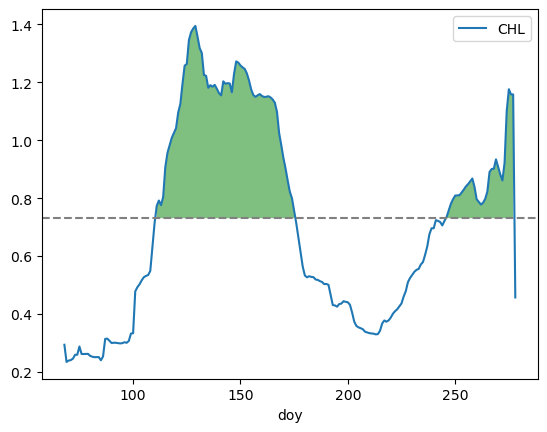

In [39]:
# plot doy CHL and fill area of blooms
df_clim.plot(x='doy', y='CHL')
# add threshold
plt.axhline(chl_th, color='grey', linestyle='--')


#plt.fill_between(df2018['doy'], ave, df2018['CHL'], where=df2018['CHL'] >= ave, facecolor='green', interpolate=True)

# fill area aboce threshold
plt.fill_between(df_clim['doy'], chl_th, df_clim['CHL'], where=df_clim['CHL'] >= chl_th, facecolor='green',  alpha=0.5)

# fill area above threshold if belongs to a bloom (bloom_id not null) (not below threshold)
#plt.fill_between(df_clim['doy'], df_clim['CHL'], where=(df_clim['bloom_id'].notnull()) 

provo a generalizzare il calcolo

In [60]:
def peaks_dataframe(ds):
    """
    Args:
    - ds: DataFrame containing columns ['year', 'lab', 'doy', 'CHL']

    Returns:
    - DataFrame with original structure plus 'peak_id' column
    """
    def count_peaks_for_group(grouped_df):
        chl_th = grouped_df['CHL'].median() * 1.05
        grouped_df['is_above_threshold'] = grouped_df['CHL'] > chl_th
        grouped_df['is_above_threshold'].fillna(method='ffill', inplace=True)
        grouped_df['group'] = (grouped_df['is_above_threshold'] != grouped_df['is_above_threshold'].shift()).cumsum()
        grouped_df['group_over'] = grouped_df['group'] * grouped_df['is_above_threshold']

        group_counts = grouped_df.groupby('group_over').size()
        valid_groups = group_counts[group_counts >= 14].index

        blooms = grouped_df[grouped_df['group_over'].isin(valid_groups) & grouped_df['is_above_threshold']]
        blooms = blooms.copy()
        blooms['bloom_id'] = blooms['group_over'].astype('category').cat.codes + 1

        return grouped_df.merge(blooms[['doy', 'bloom_id']], on='doy', how='left')

    return ds.groupby(['year', 'lab'], group_keys=False).apply(count_peaks_for_group).reset_index(drop=True)

# Example 


In [61]:

# Assumi che il tuo DataFrame si chiami df_clim e abbia colonne 'year' e 'lab'.
peaks_per_group = df2.groupby(['year', 'lab']).apply(peaks_dataframe)
print(peaks_per_group)



                           time   latitude  longitude  CHL         lab  year  \
year lab                                                                       
1998 1.78_75.4  0    1998-03-01  75.401042   1.776042  NaN   1.78_75.4  1998   
                1    1998-03-02  75.401042   1.776042  NaN   1.78_75.4  1998   
                2    1998-03-03  75.401042   1.776042  NaN   1.78_75.4  1998   
                3    1998-03-04  75.401042   1.776042  NaN   1.78_75.4  1998   
                4    1998-03-05  75.401042   1.776042  NaN   1.78_75.4  1998   
...                         ...        ...        ...  ...         ...   ...   
2022 9.38_74.42 240  2022-10-27  74.421875   9.380208  NaN  9.38_74.42  2022   
                241  2022-10-28  74.421875   9.380208  NaN  9.38_74.42  2022   
                242  2022-10-29  74.421875   9.380208  NaN  9.38_74.42  2022   
                243  2022-10-30  74.421875   9.380208  NaN  9.38_74.42  2022   
                244  2022-10-31  74.4218

In [65]:
# seleziona solo lab = alla terza riga di coo["coo"] su peaks_per_group
es = peaks_per_group[peaks_per_group['lab'] == coo["coo"][2]]

# attacca anno a es
es['year'] = es['time'].str[:4]



/tmp/ipykernel_3310/1981532319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  es['year'] = es['time'].str[:4]


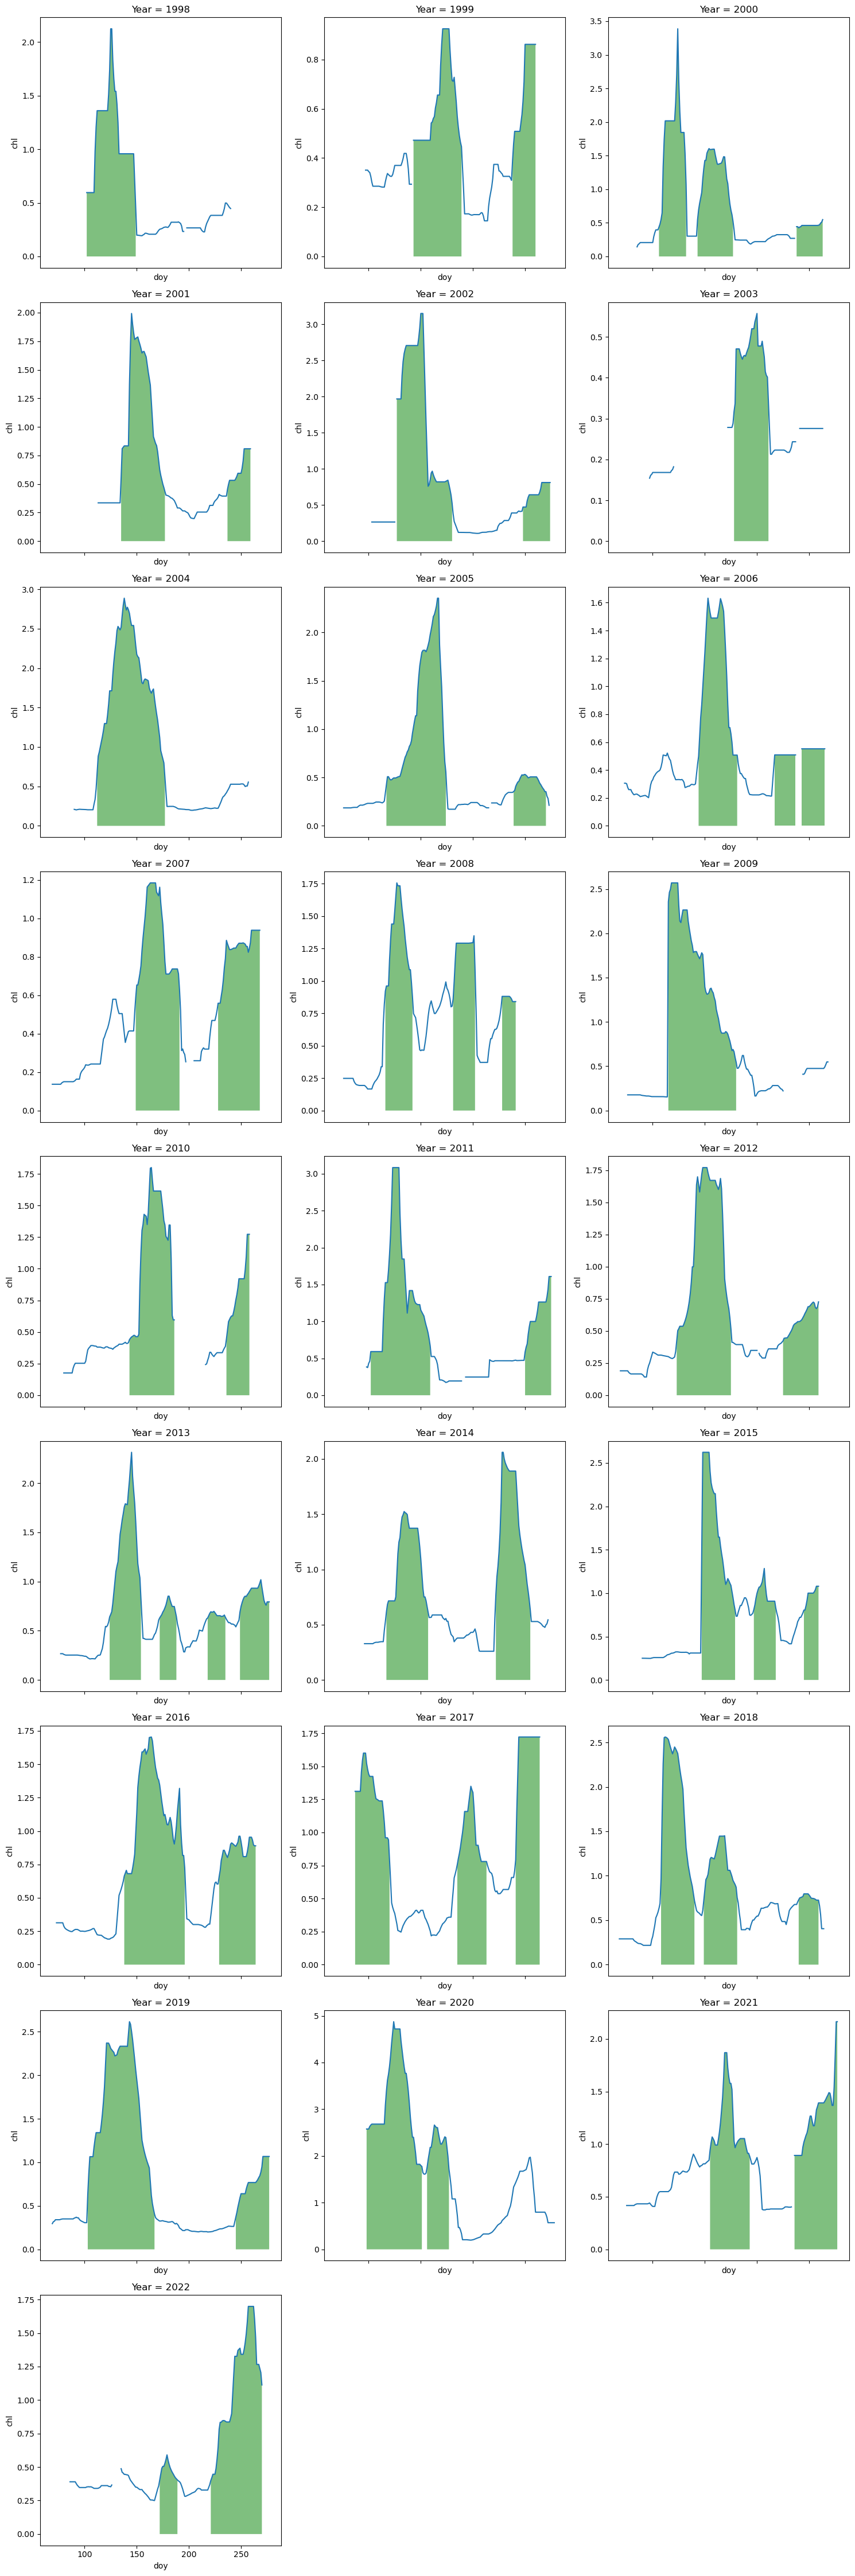

In [69]:

unique_years = es['year'].unique()


n_years = len(unique_years)
n_cols = 3  # Max number of columns
n_rows = math.ceil(n_years / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, sharex=True,  figsize=(5 * n_cols, 5 * n_rows))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Hide the extra subplots if the total number of subplots is more than n_years
for ax in axs[n_years:]:
    ax.axis('off')

for i, year in enumerate(unique_years):
    ax = axs[i]
    subset_year = es[es['year'] == year]
#    for lab in unique_labs:
#        subset = subset_year[subset_year['lab'] == lab]
    ax.plot(subset_year['doy'], subset_year['CHL'])
    # aggiungi una linea verde in corrispondenza dei picchi
    ax.fill_between(subset_year['doy'], subset_year['CHL'], where=subset_year['bloom_id'].notnull(), facecolor='green',  alpha=0.5)
    #ax.fill_between(subset_year['doy'], subset_year['CHL'], where=subset_year['CHL'] >= chl_th, facecolor='green',  alpha=0.5)
    ax.set_title(f'Year = {year}')
    ax.set_xlabel('doy')
    ax.set_ylabel('chl')
#    ax.legend()

plt.tight_layout()
plt.show()

In [59]:
# crea un df3 attaccando a df2 la colonna bloom_id
df3 = df2.merge(peaks_per_group, on=['year', 'lab', 'doy'], how='left')


ValueError: 'year' is both an index level and a column label, which is ambiguous.

In [53]:

def count_peaks_pixelwise(chl_data):
    # Calcolare la soglia come mediana * 1.05 per ogni pixel
    chl_th = chl_data.median(dim='doy') * 1.05

    is_above_threshold = chl_data > chl_th

    # Utilizziamo una convenzione: -1 indica che il valore precedente non era sopra la soglia,
    # 1 indica che lo era. Questo ci aiuta a identificare i cambiamenti.
    changes = xr.concat([-1 * is_above_threshold.isel(doy=0), is_above_threshold.diff('doy')], dim='doy')

    # Contare i giorni consecutivi sopra la soglia
    grouped_days = (changes.where(changes != 0).fillna(0).cumsum('doy') * is_above_threshold).astype(int)

    # Calcolare la dimensione di ogni gruppo sopra la soglia
    group_counts = (grouped_days.groupby(grouped_days) == 1).sum('doy')

    valid_groups = group_counts.where(group_counts >= 14).dropna(dim='grouped_days', how='all').coords['grouped_days'].values

    blooms = grouped_days.where(grouped_days.isin(valid_groups), drop=True)

    # Qui assumiamo che ogni valore diverso da zero in "blooms" rappresenti un picco valido
    # e quindi contiamo i picchi unici (cioè i valori diversi da zero) lungo la dimensione del tempo.
    peak_count = xr.apply_ufunc(lambda x: len(np.unique(x[x!=0])), blooms, input_core_dims=[['doy']], vectorize=True)

    return peak_count

In [54]:

clim_npeaks = count_peaks_pixelwise(chl_mean)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [31]:
group_counts

group_over_threshold
False    149
True      97
dtype: int64

In [30]:
valid_groups

Index([False, True], dtype='bool', name='group_over_threshold')

In [22]:
df_clim

,doy,latitude,longitude,CHL,lon,lat,is_above_threshold,group
1022731,60,74.911458,22.244792,NaN,22.24,74.91,False,1
2340619,61,74.911458,22.244792,NaN,22.24,74.91,False,1
3658507,62,74.911458,22.244792,NaN,22.24,74.91,False,1
4976395,63,74.911458,22.244792,NaN,22.24,74.91,False,1
6294283,64,74.911458,22.244792,NaN,22.24,74.91,False,1
...,...,...,...,...,...,...,...,...
318633739,301,74.911458,22.244792,NaN,22.24,74.91,False,5
319951627,302,74.911458,22.244792,NaN,22.24,74.91,False,5
321269515,303,74.911458,22.244792,NaN,22.24,74.91,False,5
322587403,304,74.911458,22.244792,NaN,22.24,74.91,False,5


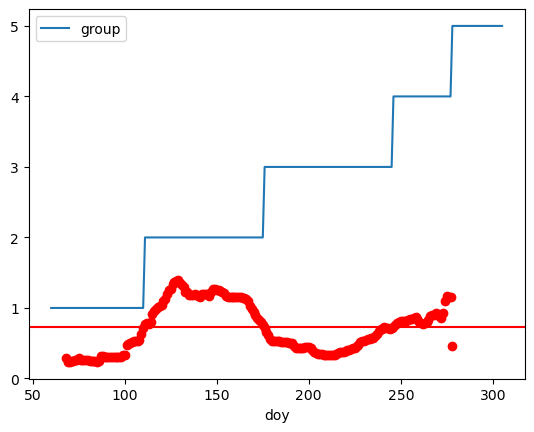

In [28]:
# plot doy group e una linea con doy chl
df_clim.plot(x='doy', y='group')
plt.axhline(y=chl_th, color='r', linestyle='-')
plt.scatter(df_clim['doy'], df_clim['CHL'], color='red', label='blooms')

In [20]:
num_of_blooms = len(valid_groups)
print(f"Number of blooms: {num_of_blooms}")

Number of blooms: 5


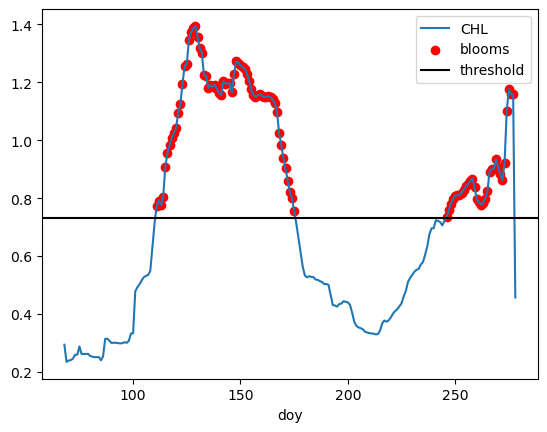

In [21]:
# plotto la serie temporale di CHL con i punti di bloom aggiungo la soglia
df_clim.plot(x='doy', y='CHL')
plt.scatter(blooms['doy'], blooms['CHL'], color='red', label='blooms')
plt.axhline(chl_th, color='black', label='threshold')
plt.legend()
plt.show()


In [ ]:
# definisco i bloom come le zone sopra la soglia per almeno 14 giorni consecutivi
# creo una colonna bloom con valori 0
df_clim['bloom'] = 0



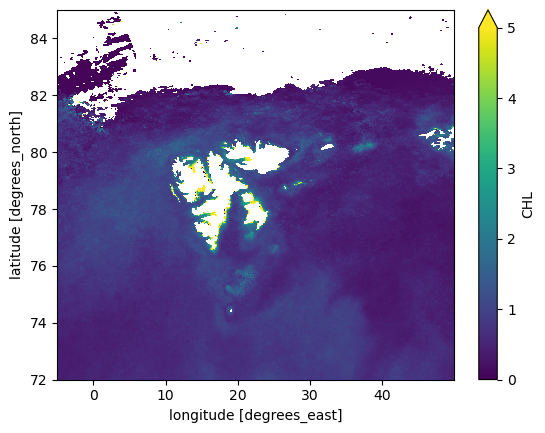

In [17]:
threshold = chl_mean.median(dim="doy") * 1.05
# plot threshold
threshold['CHL'].plot(vmin=0, vmax=5)

In [19]:
over_threshold = chl_mean > threshold
over_threshold

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056, doy: 246)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * doy        (doy) int64 60 61 62 63 64 65 66 ... 299 300 301 302 303 304 305
Data variables:
    CHL        (doy, latitude, longitude) bool False False False ... False False

In [20]:
    # Differentiate to find start and end of blooms
differentiated = over_threshold.astype(int).diff(dim="doy")
bloom_starts = (differentiated == 1)
bloom_ends = (differentiated == -1)

In [21]:
differentiated

<xarray.Dataset>
Dimensions:    (doy: 245, latitude: 1248, longitude: 1056)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * doy        (doy) int64 61 62 63 64 65 66 67 ... 299 300 301 302 303 304 305
Data variables:
    CHL        (doy, latitude, longitude) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0

In [23]:
# Calculate duration of each bloom
bloom_durations = (bloom_ends * 0).cumsum(dim="doy") - (bloom_starts * 0).cumsum(dim="doy") + bloom_starts
bloom_durations

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056, doy: 245)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * doy        (doy) int64 61 62 63 64 65 66 67 ... 299 300 301 302 303 304 305
Data variables:
    CHL        (doy, latitude, longitude) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0

In [31]:
# max of bloom_durations (estraendo i valori)
max_bloom_durations = bloom_durations.max(dim="doy")
max_bloom_durations

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    CHL        (latitude, longitude) int64 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1

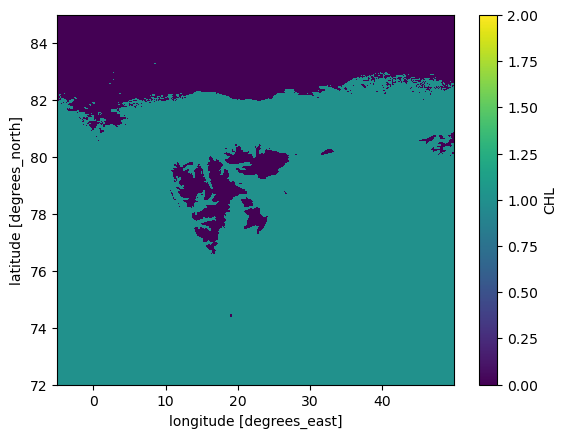

In [35]:
# plot max_bloom_durations
max_bloom_durations['CHL'].plot(vmin=0, vmax=2)

In [27]:
# Identify valid blooms
valid_blooms = bloom_durations.where(bloom_durations >= 14).notnull()
valid_blooms


<xarray.Dataset>
Dimensions:    (doy: 245, latitude: 1248, longitude: 1056)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * doy        (doy) int64 61 62 63 64 65 66 67 ... 299 300 301 302 303 304 305
Data variables:
    CHL        (doy, latitude, longitude) bool False False False ... False False

In [ ]:
# Count valid blooms
bfreq = valid_blooms.sum(dim="doy")
bfreq

In [5]:
from scipy.integrate import simps

def calculate_metrics(da):
    # Calculate threshold
    threshold = da.median(dim="doy") * 1.05
    over_threshold = da > threshold
    
    # Differentiate to find start and end of blooms
    differentiated = over_threshold.astype(int).diff(dim="doy")
    bloom_starts = (differentiated == 1)
    bloom_ends = (differentiated == -1)
    
    # Calculate duration of each bloom
    bloom_durations = (bloom_ends * 0).cumsum(dim="doy") - (bloom_starts * 0).cumsum(dim="doy") + bloom_starts
    
    # Identify valid blooms
    valid_blooms = bloom_durations.where(bloom_durations >= 14).notnull()
    
    # Count valid blooms
    bfreq = valid_blooms.sum(dim="doy")
    
    # Identify peaks for valid blooms
    if valid_blooms.any(): # Check if there are any valid blooms
      peaks = da.where(valid_blooms).groupby('doy').max(dim="doy")
      max_chl = peaks.max()
    else:
        peaks = xr.DataArray(np.nan, coords=da.coords) # Creating a placeholder DataArray filled with NaN values
        max_chl = np.nan
    
    # BPeak, BInit, BTerm
    valid_peak_values = peaks.where(peaks == max_chl, drop=True).doy.values
    bpeak = valid_peak_values[0] if valid_peak_values.size > 0 else np.nan
    binit = da.where(valid_blooms).doy.min().values if valid_blooms.any() else np.nan
    bterm = da.where(valid_blooms).doy.max().values if valid_blooms.any() else np.nan
    
    # BDur, BArea
    bdur = (bterm - binit + 1) if (binit is not np.nan and bterm is not np.nan) else np.nan
    barea = xr.apply_ufunc(simps, da.where(valid_blooms), input_core_dims=[["doy"]], kwargs={"x": da.doy}, vectorize=True) if valid_blooms.any() else np.nan
    
    # YArea
    yarea = xr.apply_ufunc(simps, da, input_core_dims=[["doy"]], kwargs={"x": da.doy}, vectorize=True)
    
    # BAmp
    bamp = max_chl - da.mean(dim="doy")
    
    # Bdiff, BPeakdiff
    flattened_peaks = peaks.values.flatten()
    sorted_peaks_values = np.sort(flattened_peaks)[::-1]  # Descending order
    
    max_peak = sorted_peaks_values[0]
    second_max_peak = sorted_peaks_values[1] if len(sorted_peaks_values) > 1 else np.nan

    if len(sorted_peaks_values) > 1:
        bdiff = max_peak - second_max_peak
        bpeakdiff = np.nan  # For now, we'll leave this as NaN due to challenges with the numpy array.
    else:
        bdiff = np.nan
        bpeakdiff = np.nan
    
    metrics = {
        'Mean': da.mean(dim="doy"),
        'Max': max_chl,
        'BAmp': bamp,
        'BPeak': bpeak,
        'BInit': binit,
        'BTerm': bterm,
        'BDur': bdur,
        'BArea': barea,
        'YArea': yarea,
        'BFreq': bfreq,
        'Bdiff': bdiff,
        'BPeakdiff': bpeakdiff
    }
    
    return metrics

# Assuming chl_mean is your Dataset
ds = chl_mean.copy()
metrics = calculate_metrics(ds.CHL)
for metric_name, calculation in metrics.items():
    ds[metric_name] = calculation

print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056, doy: 246)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * doy        (doy) int64 60 61 62 63 64 65 66 ... 299 300 301 302 303 304 305
Data variables: (12/13)
    CHL        (doy, latitude, longitude) float32 nan nan nan ... nan nan nan
    Mean       (latitude, longitude) float32 nan nan nan ... 0.6647 0.68 0.6806
    Max        float64 nan
    BAmp       (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan
    BPeak      float64 nan
    BInit      float64 nan
    ...         ...
    BDur       float64 nan
    BArea      float64 nan
    YArea      (latitude, longitude) float64 nan nan nan nan ... nan nan nan nan
    BFreq      (latitude, longitude) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    Bdiff      float64 nan
    BPeakdiff  float64 nan


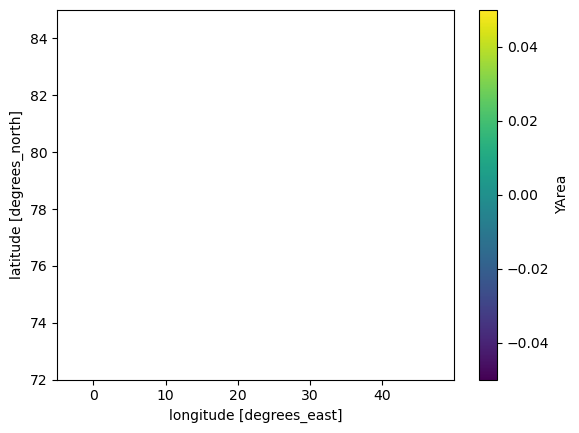

In [10]:
# plotta BFreq
ds['YArea'].plot()